In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


In [74]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [75]:
# Or:
#df = pd.read_csv('fcc-forum-pageviews.csv')
#df = df.set_index('date')

In [76]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


#### quantile(0.025) on a pandas Series or DataFrame
#### it calculates the 2.5th percentile of the data. This means it finds the value below which 2.5% of the data falls.

In [77]:
# Clean the data by filtering out days when the page views were in the top 2.5% of
# the dataset or bottom 2.5% of the dataset.

# Filter out days in the top 2.5% and bottom 2.5%
top_threshold = df['value'].quantile(0.975)
bottom_threshold = df['value'].quantile(0.025)

# Filter to keep only the top 2.5% and bottom 2.5% of page views

df = df[(df['value'] >= bottom_threshold) & (df['value'] <= top_threshold)]


print(top_threshold, bottom_threshold)

print(df)

177613.075 17876.4
             value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]


<Axes: xlabel='date'>

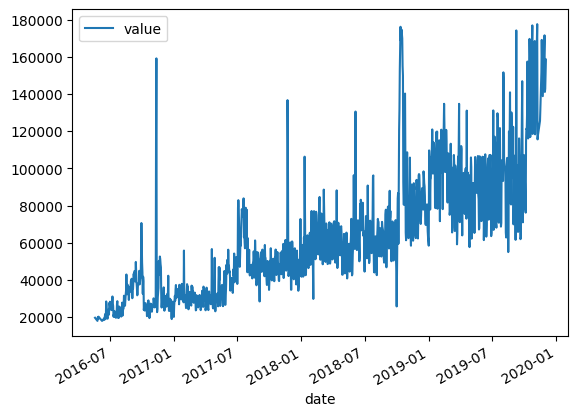

In [78]:
df.plot()

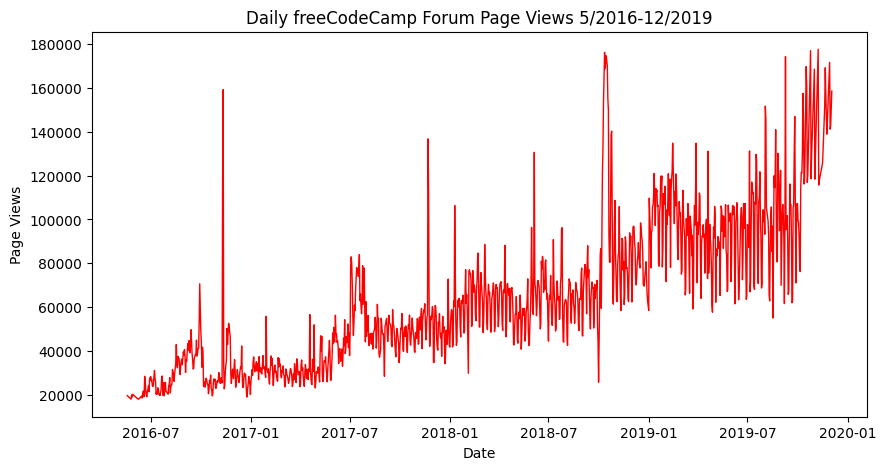

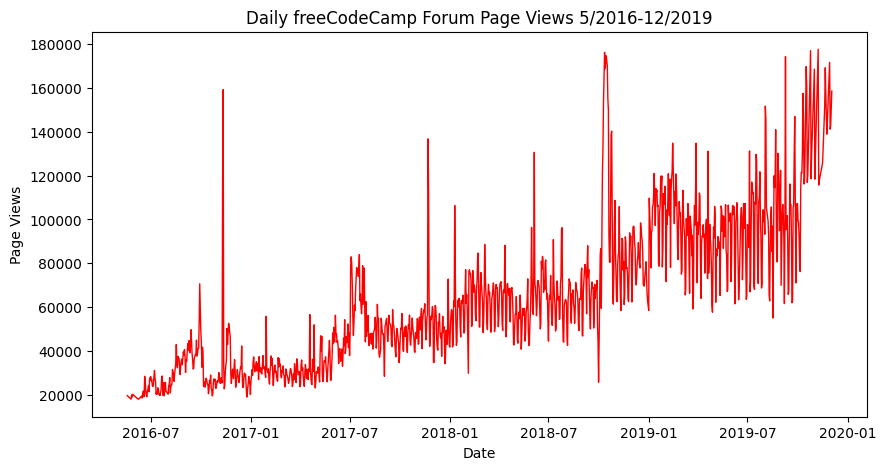

In [79]:
def draw_line_plot():
    # Create a figure and axis with a specific size (16x9 inches)
    fig, ax = plt.subplots(figsize=(10, 5))  
    # Plot the data from the DataFrame 'df' on the specified axis with a title
    ax.plot(df.index, df['value'], 'r', linewidth = 1)
    # Set the label for the x-axis & y-axis and title
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')  
    ax.set_ylabel('Page Views')
    # Save the figure as an image file named 'line_plot.png'
    fig.savefig('line_plot.png') 
    # Return the figure object 
    return fig  

draw_line_plot()

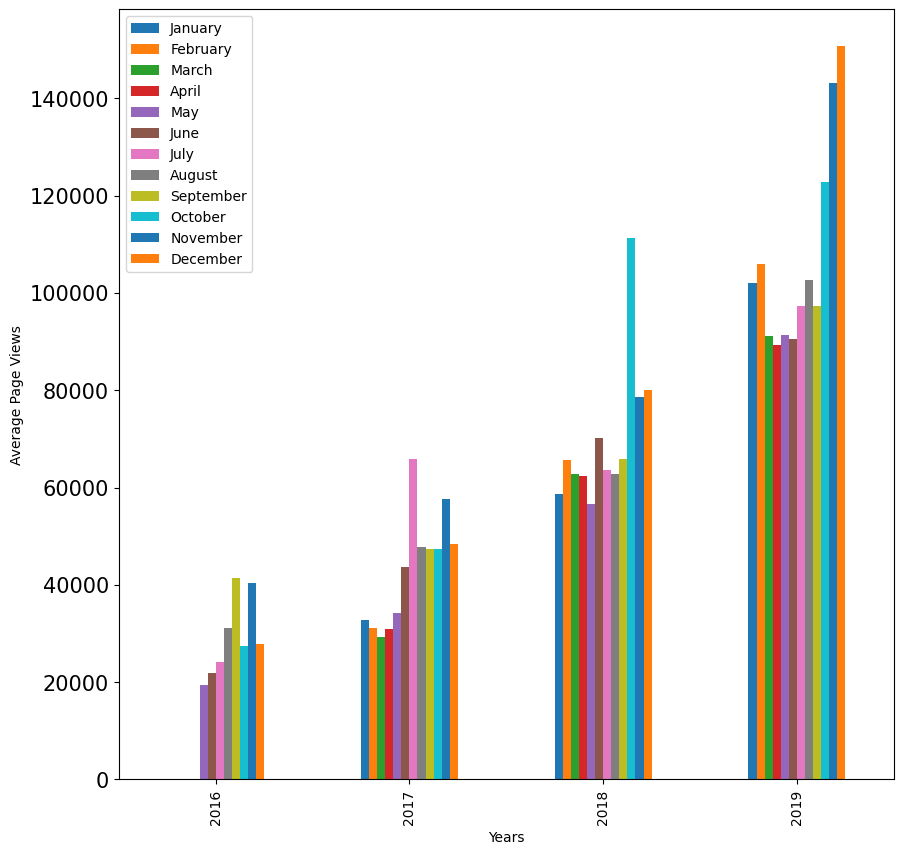

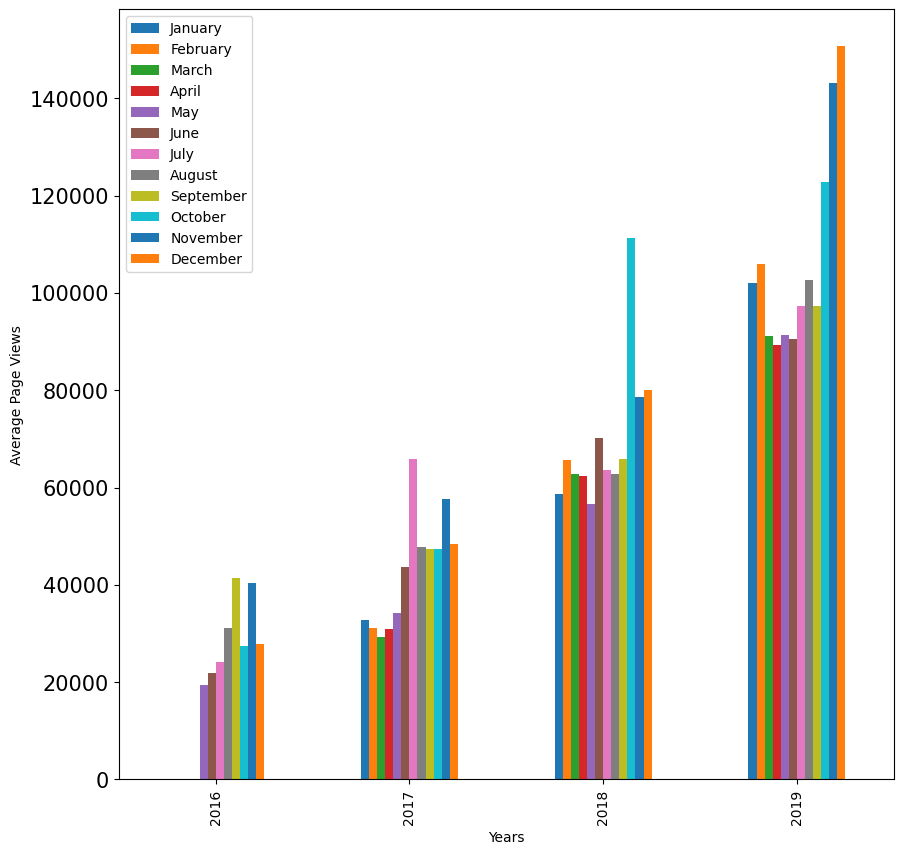

In [80]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df['month'] = df.index.month
    df['year'] = df.index.year
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()

    # Draw bar plot
    fig = df_bar.plot.bar(legend = True, figsize = (10,10), ylabel = 'Average Page Views',
                          xlabel = 'Years').figure
    plt.legend(['January', 'February', 'March', 'April',
                 'May', 'June', 'July', 'August',
                   'September', 'October', 'November', 'December'])

    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 15)

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()

#### legend=True parameter
It is used to control the display of the legend on the plot. When legend=True, the legend is displayed, showing labels for the data series being plotted. If legend=False (or if the parameter is omitted, as False is the default value), the legend will not be shown

#### unstack()
The unstack() method in pandas is used to pivot a level of the (possibly hierarchical) index labels, returning a DataFrame having a new level of column labels. This is particularly useful when you have a DataFrame with a MultiIndex (hierarchical index) and you want to reshape it into a format where one of the levels of the index becomes the columns of the DataFrame.

In the context of your draw_bar_plot() function, you're working with a DataFrame df that has been grouped by 'year' and 'month', and you're calculating the mean 'value' for each group. This results in a Series with a MultiIndex, where the first level of the index is 'year' and the second level is 'month'. The values of this Series are the mean 'value' for each combination of 'year' and 'month'.

When you call df_bar.unstack(), you're reshaping this Series into a DataFrame where the 'year' values become the columns of the DataFrame, and the 'month' values become the index. The mean 'value' for each combination of 'year' and 'month' becomes the values in the DataFrame. This is particularly useful for creating a bar plot where each column represents a year, and each row represents a month, with the values being the mean 'value' for that month in that year.

C:\Users\Laptop Market - LTM\AppData\Local\Temp\ipykernel_18200\2200747761.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0], palette="tab10")
C:\Users\Laptop Market - LTM\AppData\Local\Temp\ipykernel_18200\2200747761.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1], palette="tab10")


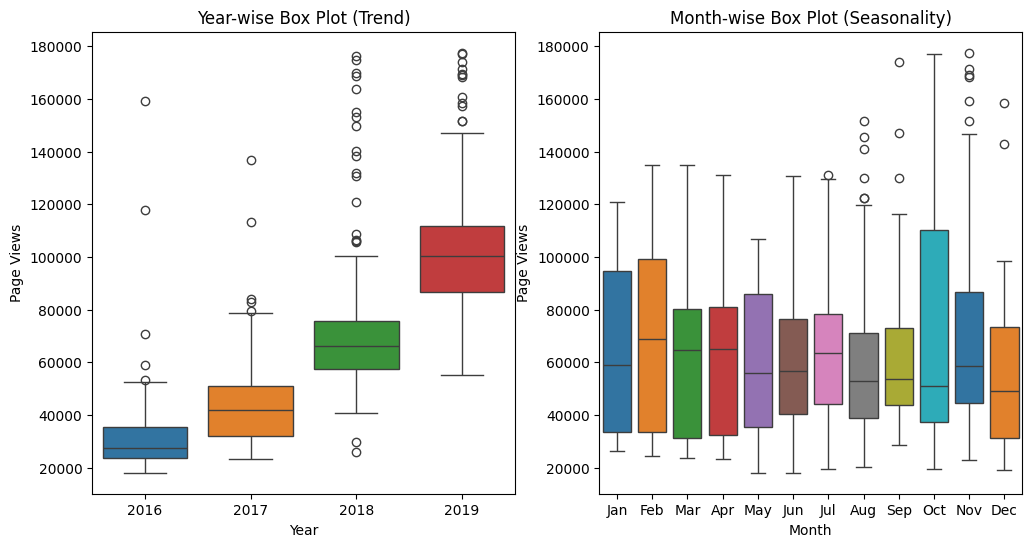

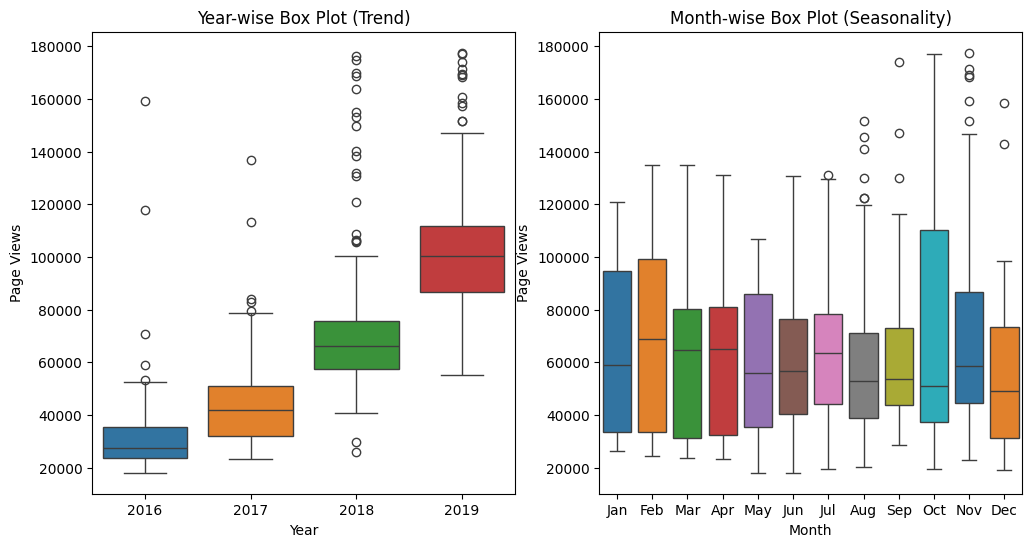

In [88]:
def draw_box_plot():
    # Assuming df is defined and contains your data
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    # Year-wise Box Plot (Trend) with colorful boxes
    axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0], palette="tab10")
    # Month-wise Box Plot (Seasonality) with colorful boxes
    axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1], palette="tab10")

    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()
